In [ ]:
# Para descargar seaborn usar: pip install seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
# Definimos las columnas que nos interesan
fields = ['country', 'points','price', 'variety']

# Cargamos el DataFrame solo con esas columnas
wine_reviews = pd.read_csv('wine_reviews.csv', usecols = fields)
wine_reviews.head()

,country,points,price,variety
0,Italy,87,NaN,White Blend
1,Portugal,87,15.0,Portuguese Red
2,US,87,14.0,Pinot Gris
3,US,87,13.0,Riesling
4,US,87,65.0,Pinot Noir


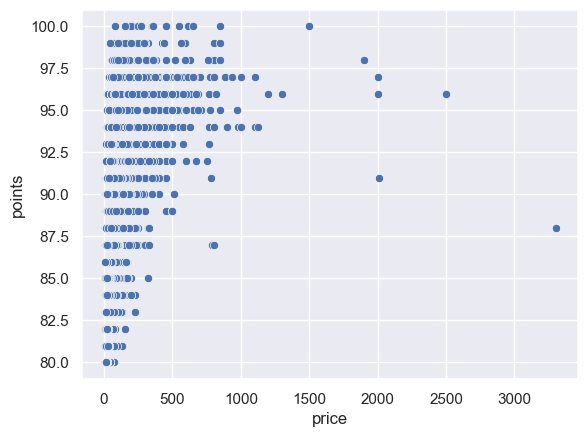

In [3]:
ax = sns.scatterplot(x="price", y="points", data=wine_reviews)

In [4]:
lista_paises = ['Argentina','Chile','Spain']
wine_reviews_filtradas = wine_reviews[wine_reviews['country'].isin(lista_paises)]
wine_reviews_filtradas.head()

,country,points,price,variety
5,Spain,87,15.0,Tempranillo-Merlot
16,Argentina,87,30.0,Malbec
17,Argentina,87,13.0,Malbec
18,Spain,87,28.0,Tempranillo Blend
36,Chile,86,15.0,Viognier-Chardonnay


### **1** 
Siguiendo lo realizado en el notebook anterior, realice un gráfico scatter plot de precio vs puntaje en el cual diferencie por color el pais de origen de cada vino (Argentina, España o Chile).

In [6]:
ARG_wine_reviews = wine_reviews_filtradas[wine_reviews_filtradas['country']=='Argentina']
# Tomamos como coordenadas en x los precios
precio_arg = ARG_wine_reviews.price.values
# Tomamos como coordenadas en y el puntaje de la review
puntos_arg = ARG_wine_reviews.points.values

CHI_wine_reviews = wine_reviews_filtradas[wine_reviews_filtradas['country']=='Chile']
# Tomamos como coordenadas en x los precios
precio_chi = CHI_wine_reviews.price.values
# Tomamos como coordenadas en y el puntaje de la review
puntos_chi = CHI_wine_reviews.points.values

ESP_wine_reviews = wine_reviews_filtradas[wine_reviews_filtradas['country']=='Spain']
# Tomamos como coordenadas en x los precios
precio_esp = ESP_wine_reviews.price.values
# Tomamos como coordenadas en y el puntaje de la review
puntos_esp = ESP_wine_reviews.points.values

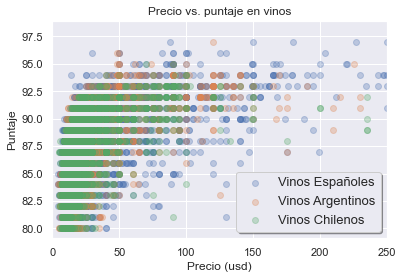

In [7]:
fig = plt.figure()
ax = plt.axes()

# Graficamos putnos semi transparentes, cada uno con el label adecuado

ax.scatter(precio_esp, puntos_esp, label = 'Vinos Españoles',alpha = 0.3)
ax.scatter(precio_arg, puntos_arg, label = 'Vinos Argentinos',alpha = 0.3)
ax.scatter(precio_chi, puntos_chi, label = 'Vinos Chilenos',alpha = 0.3)

ax.set(xlabel='Precio (usd)', ylabel='Puntaje',
       title='Precio vs. puntaje en vinos', xlim = (0,250))

# Agregamos la leyenda al gráfico, la graficamos abajo a la derecha
ax.legend(loc='lower right', shadow=True, fontsize=13)

Para realizar este mismo gráfico con seaborn, solo precisamos una linea de código: 

In [5]:
wine_reviews_filtradas.head()

,country,points,price,variety
5,Spain,87,15.0,Tempranillo-Merlot
16,Argentina,87,30.0,Malbec
17,Argentina,87,13.0,Malbec
18,Spain,87,28.0,Tempranillo Blend
36,Chile,86,15.0,Viognier-Chardonnay


<Axes: xlabel='price', ylabel='points'>

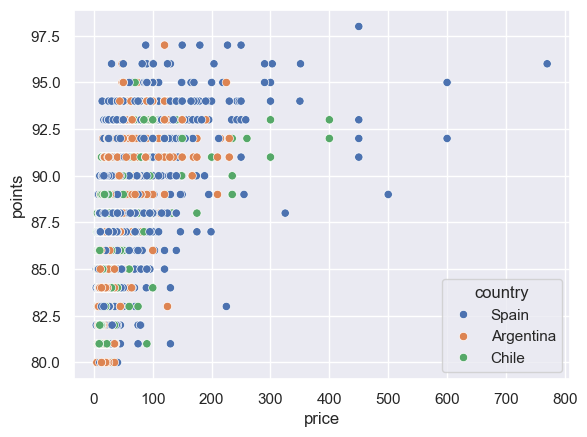

In [7]:
sns.scatterplot(data=wine_reviews_filtradas, y = "points", x = "price", hue = "country")

En este caso, le estamos indicando a la funcion `scatterplot` que no solo queremos que tome la columna `price` como eje `x` y la columna `points` como eje `y`, sino que además queremos que indique con colores distintos los puntos segun su valor de la columna `country`. Esto lo hacemos mediante el argumento `hue` (`hue="country"`).

Esperamos con estos primeros ejemplos haberlos convencido que el uso de Seaborn facilita la visualización de datos provienentes de un DataFrame respecto a la utilización de (solo) Matplotlib. A continuación vamos a explorar algunas de las funciones de visualización que nos ofrece esta libreria.

Como se puede observar, Seaborn le da automáticamente distintos colores a las categorías y además los separa para poder identificar la cantidad de puntos en cada grupo con facilidad.

### **2**

1. Realizar con Seaborn un gráfico del ancho del petalo según la especie
2. Realizar el mismo gráfico, pero ahora como gráfico de barras. **Pista**: ver el parametro `kind`
3. ¿Que representan las barritas negras?
4. Averiguar la utilidad de los parámetros `ci` y `estimator`.

In [8]:
iris_data = pd.read_csv('iris_dataset.csv')
iris_data.drop(columns = ['fila'], inplace= True)
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Users\dmon2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


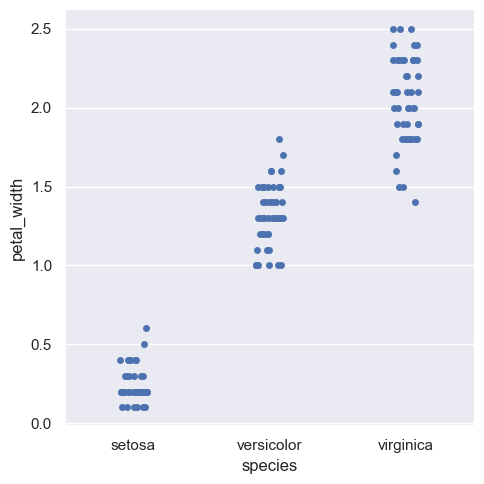

In [10]:
sns.catplot(data = iris_data,y="petal_width",x="species")

<Axes: xlabel='species', ylabel='petal_width'>

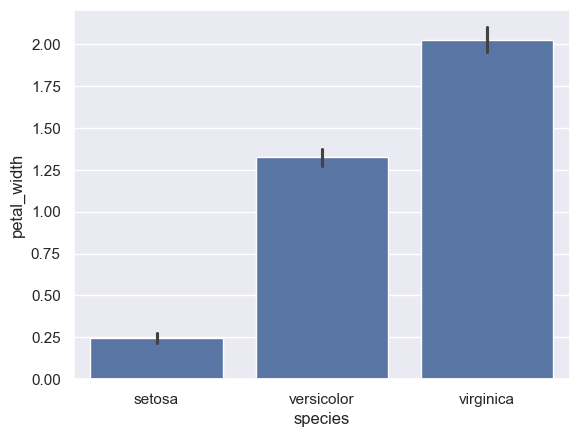

In [11]:
sns.barplot(data=iris_data,y="petal_width",x="species")

C:\Users\dmon2\AppData\Local\Temp\ipykernel_16840\3969867013.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.catplot(data=iris_data,kind="bar",x="species",y="petal_width",ci=False)
C:\Users\dmon2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


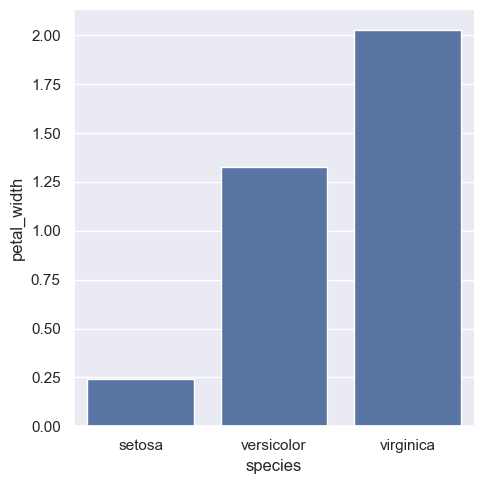

In [12]:
# LA barra negra representa el intervalo del 95% de confianza para la medida de tendencia central calculada.
# Tal y como ocurría con los gráficos de líneas con agregación, el parámetro ci (confidence interval) controla esta opción:

sns.catplot(data=iris_data,kind="bar",x="species",y="petal_width",ci=False)

C:\Users\dmon2\AppData\Local\Temp\ipykernel_16840\1705703906.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 20)` for the same effect.

  sns.catplot(data=iris_data,kind="bar",x="species",y="petal_width",ci=20)
C:\Users\dmon2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


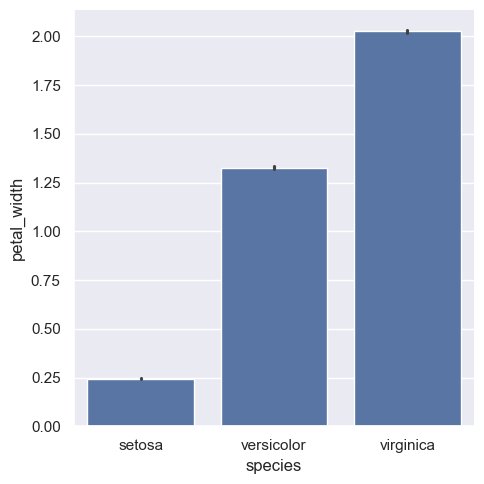

In [16]:
sns.catplot(data=iris_data,kind="bar",x="species",y="petal_width",ci=20)

C:\Users\dmon2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


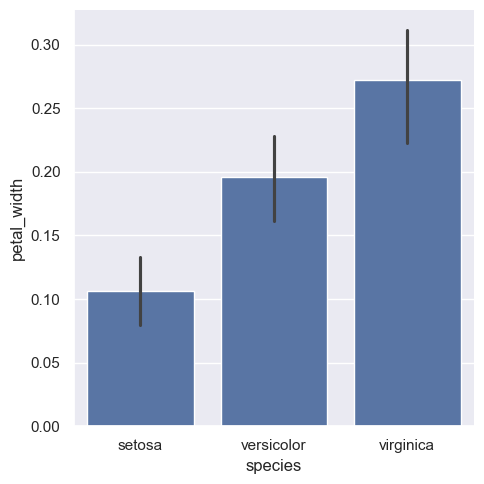

In [19]:
# El parámetro estimator permite cambiar el objeto estimador a su propia función, que convierte un vector a escalar:

sns.catplot(data=iris_data,kind="bar",x="species",y="petal_width",estimator=np.std)

### **3**

In [20]:
lista_variedades = ['Malbec','Red Blend','Cabernet Sauvignon']
vinos = wine_reviews_filtradas[wine_reviews_filtradas['variety'].isin(lista_variedades)].dropna()
vinos.head()

,country,points,price,variety
16,Argentina,87,30.0,Malbec
17,Argentina,87,13.0,Malbec
164,Chile,91,29.0,Red Blend
165,Chile,91,32.0,Cabernet Sauvignon
172,Chile,91,20.0,Cabernet Sauvignon


C:\Users\dmon2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


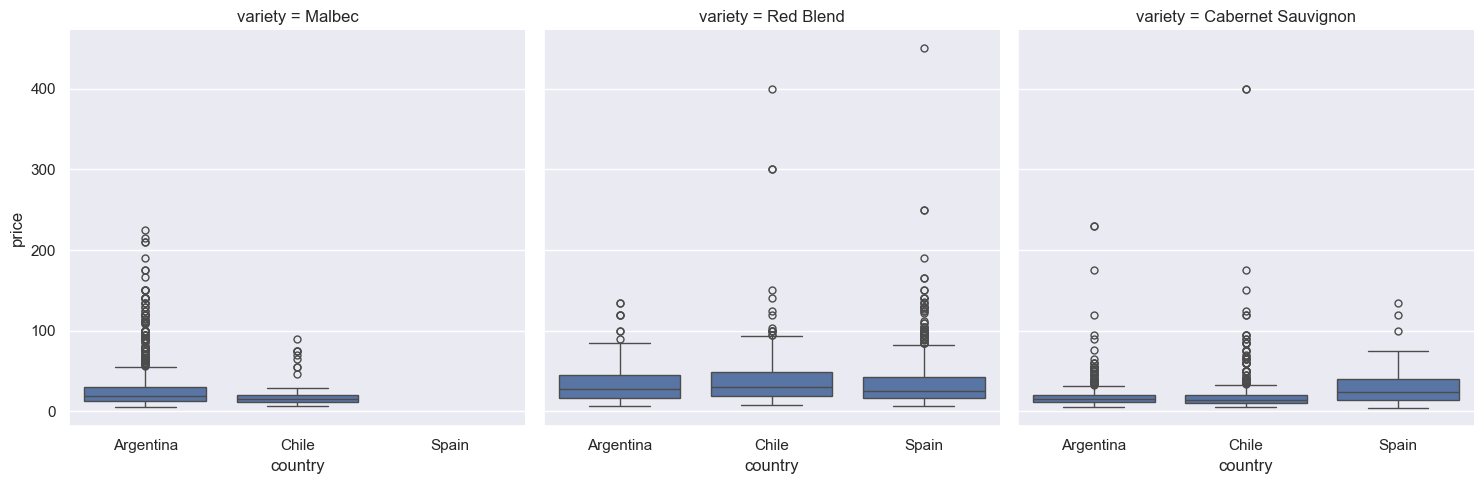

In [21]:
sns.catplot(x="country", y="price", col="variety", kind='box' , data=vinos)
#sns.boxplot(x="country", y="price", data=vinos)

C:\Users\dmon2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


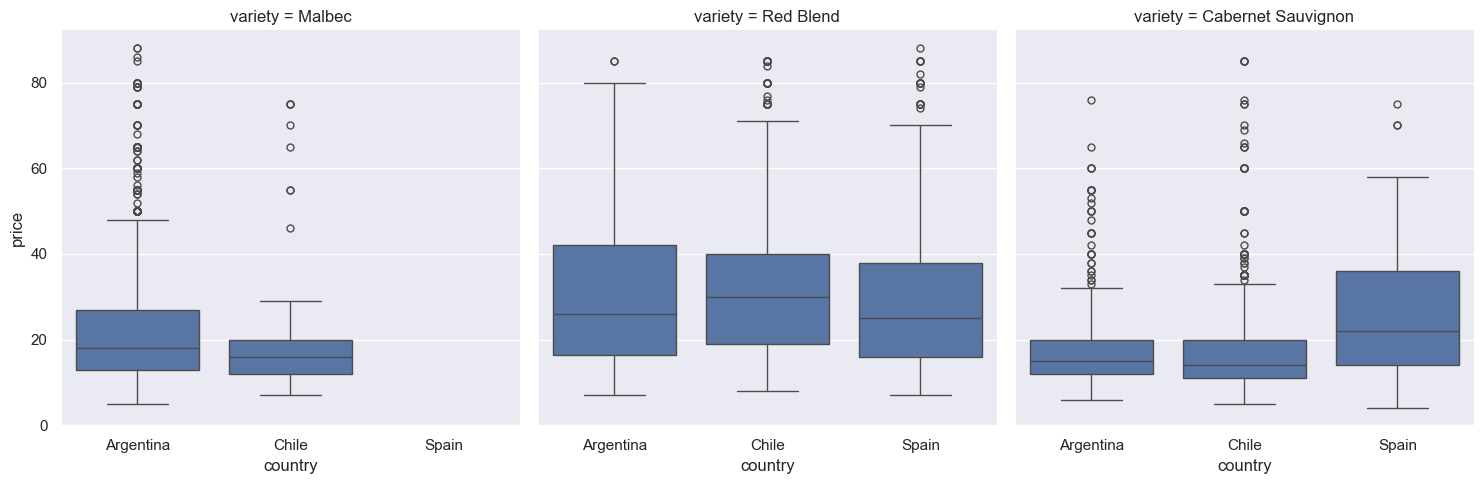

In [22]:
sns.catplot(x="country", y="price", col="variety", kind='box' , data=vinos[vinos['price'] < 90])

C:\Users\dmon2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


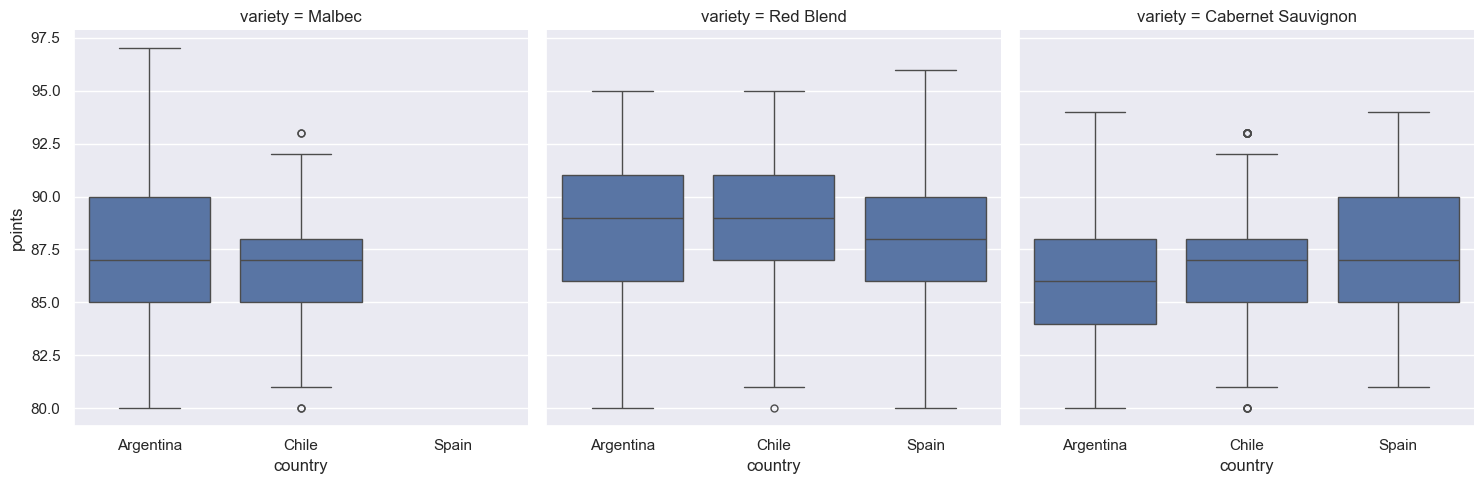

In [24]:
sns.catplot(x="country", y="points", col="variety", kind='box' , data=vinos)

1. En el último gráfico, era difícil visualizar bien los resultados debido a precios que eran mucho más grandes que los demás. ¿Cómo podría solucionar facilmente este problema? 
2. Averigüe cómo cambiar el gráfico si desea que los 3 ejes aparezcan apilados verticalmente en lugar de uno al lado del otro.
3. Averigüe cómo hacer un violin plot y conjeture en qué circunstancias podría ser de utilidad.

C:\Users\dmon2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


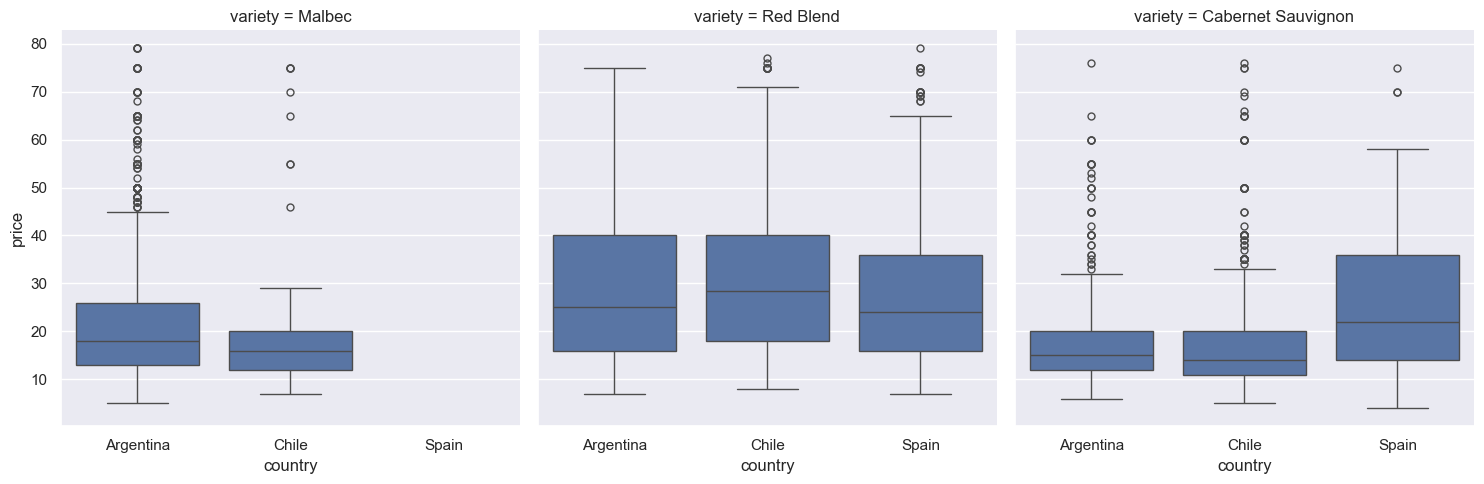

In [27]:
# Disminuyendo el tamaño de los datos: 

sns.catplot(x="country",y="price",kind="box",data=vinos[vinos["price"]<80],col="variety")

C:\Users\dmon2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


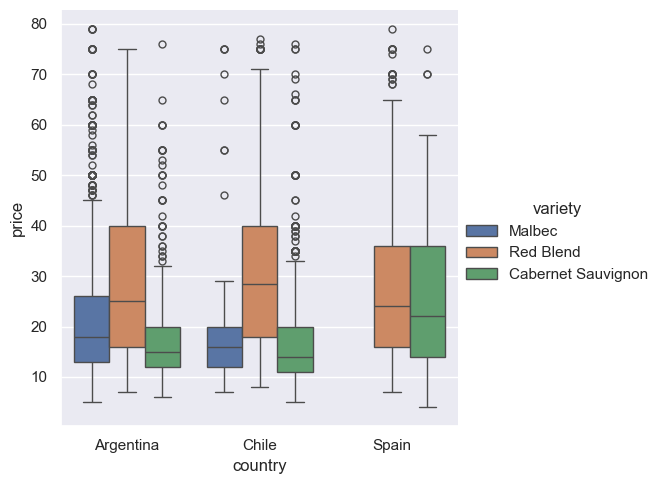

In [28]:
sns.catplot(x="country",y="price",kind="box",data=vinos[vinos["price"]<80],hue="variety")

C:\Users\dmon2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


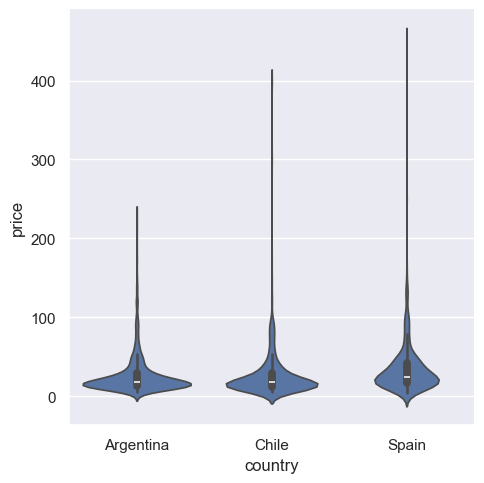

In [29]:
sns.catplot(x="country",y="price",kind="violin",data=vinos)

C:\Users\dmon2\AppData\Local\Temp\ipykernel_16840\1774714875.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iris_data['sepal_length'], hist=True, kde=True, rug=True)


<Axes: xlabel='sepal_length', ylabel='Density'>

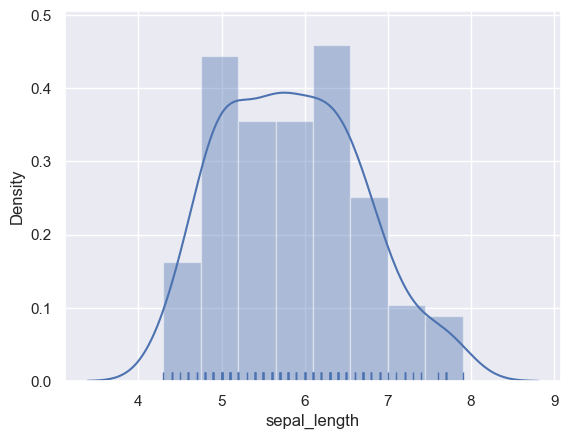

In [35]:
sns.distplot(iris_data['sepal_length'], hist=True, kde=True, rug=True)

C:\Users\dmon2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:2219: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): rug.
  warnings.warn(msg, UserWarning)


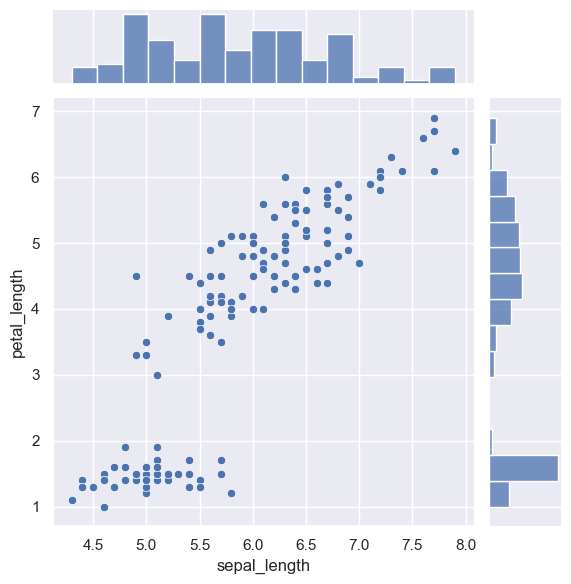

In [36]:
sns.jointplot(x="sepal_length", y="petal_length", marginal_kws=dict(bins=15, rug=True), data=iris_data)

### **4**

1. Genere un nuevo dataset a partir del dataset de vinos original (wine_reviews) que contenga sólo los vinos cuya variedad es Pinot Noir.
2. Descarte de este dataset las instancias que contengan un `NaN` en alguno de sus campos.
3. Descarte del dataset los vinos con un precio mayor a 200. Para esto pueden generarse una máscara.
4. Graficar en Seaborn un `distplot` con los precios de vinos que contenga el histograma, el KDE y el rugplot.

In [32]:
vinos_pinot = wine_reviews[wine_reviews['variety'] == 'Pinot Noir']
vinos_pinot = vinos_pinot.dropna()
vinos_pinot = vinos_pinot[vinos_pinot['price'] < 200]
vinos_pinot.head()

,country,points,price,variety
4,US,87,65.0,Pinot Noir
21,US,87,20.0,Pinot Noir
25,US,87,69.0,Pinot Noir
35,US,86,50.0,Pinot Noir
41,US,86,22.0,Pinot Noir


C:\Users\dmon2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


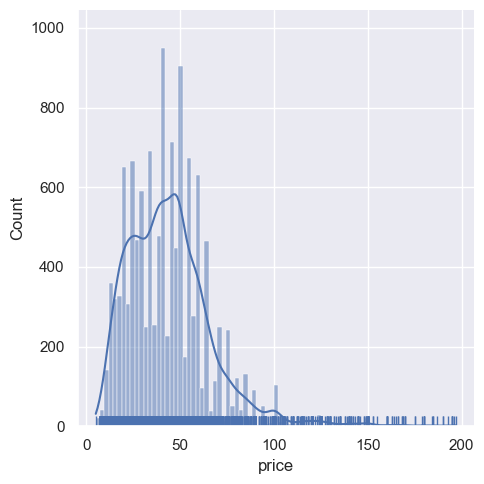

In [37]:
sns.displot(data=vinos_pinot,x="price",kind="hist",rug="true",kde=True)

C:\Users\dmon2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


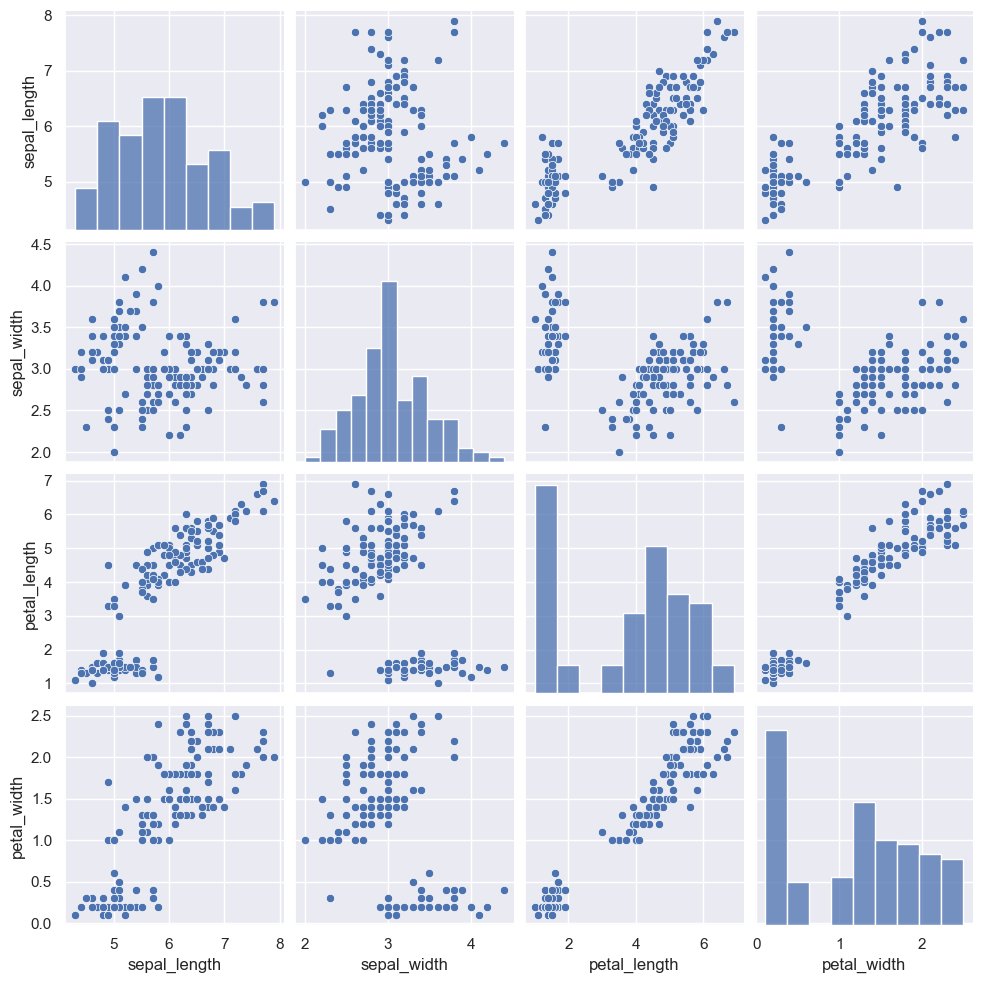

In [38]:
sns.pairplot(data=iris_data)

C:\Users\dmon2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


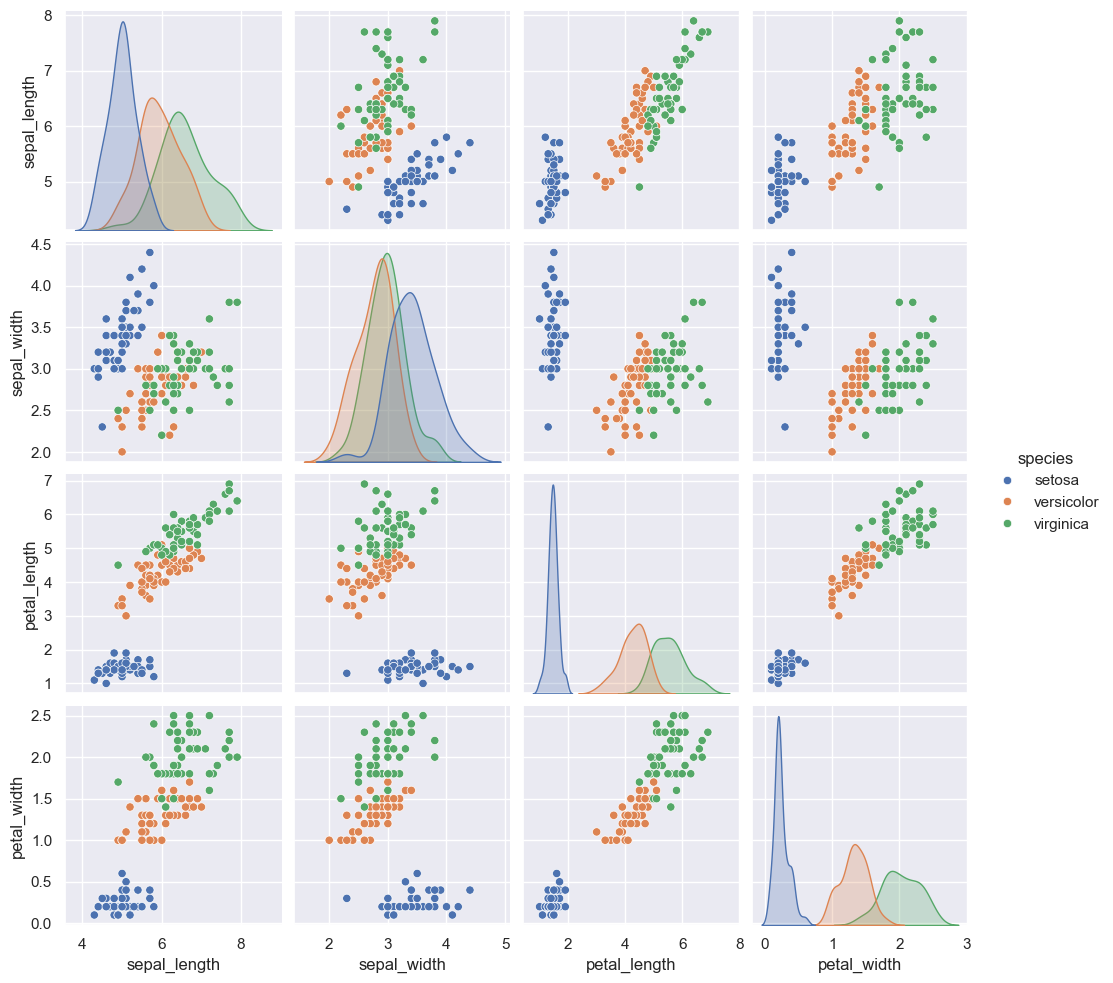

In [39]:
sns.pairplot(data=iris_data, hue="species")

### **5**

1. Graficar un `pairplot` para el dataset de vinos reducido (3 paises y 3 variedades). Antes de hacerlo, ¿cuantas filas y cuantas columans espera que tenga este gráfico?
2. Graficar el mismo `pairplot`, pero esta vez distinga los datos según variedad.
3. Idem al punto anterior, pero distinga según país.

In [42]:
wine_reviews["country"].unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

In [55]:
variedades = ["White Blend","Rosé","Red Blend"]

vinos_r = wine_reviews[wine_reviews["variety"].isin(variedades)]
vinos_r = vinos_r.dropna()
vinos_r.head()

,country,points,price,variety
20,US,87,23.0,Red Blend
22,Italy,87,19.0,White Blend
26,Italy,87,13.0,White Blend
28,Italy,87,17.0,Red Blend
33,US,86,50.0,Red Blend


In [56]:
vinos_r["country"].unique()

array(['US', 'Italy', 'Australia', 'France', 'Chile', 'South Africa',
       'Spain', 'Argentina', 'Greece', 'Austria', 'Portugal', 'Hungary',
       'Romania', 'Israel', 'Luxembourg', 'Uruguay', 'Lebanon',
       'Bulgaria', 'Slovenia', 'Czech Republic', 'Cyprus', 'Canada',
       'Turkey', 'Croatia', 'Moldova', 'Germany', 'Mexico', 'Georgia',
       'Peru', 'Serbia', 'Morocco', 'New Zealand', 'Ukraine', 'England',
       'Brazil', 'Armenia', 'Macedonia', 'Switzerland'], dtype=object)

In [57]:
paises = ["US","Spain","Italy"]
vinos_r = vinos_r[vinos_r["country"].isin(paises)]
vinos_r.head()

,country,points,price,variety
20,US,87,23.0,Red Blend
22,Italy,87,19.0,White Blend
26,Italy,87,13.0,White Blend
28,Italy,87,17.0,Red Blend
33,US,86,50.0,Red Blend


C:\Users\dmon2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


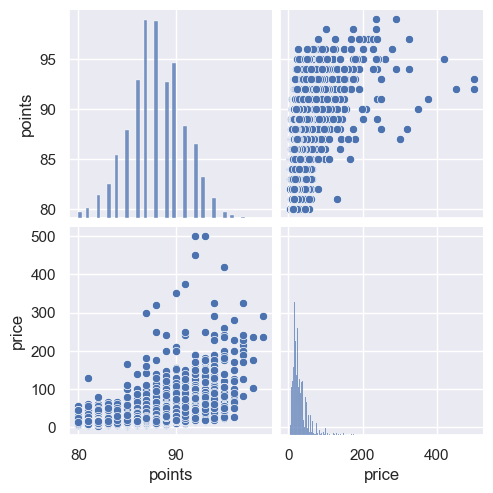

In [58]:
sns.pairplot(vinos_r)

C:\Users\dmon2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


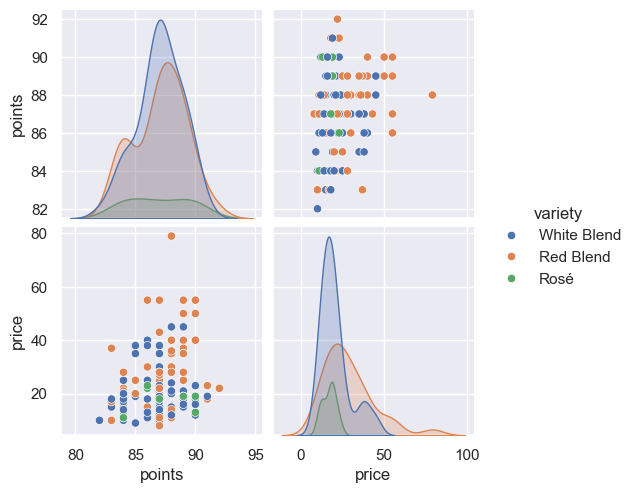

In [49]:
sns.pairplot(vinos_r,hue="variety")

C:\Users\dmon2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


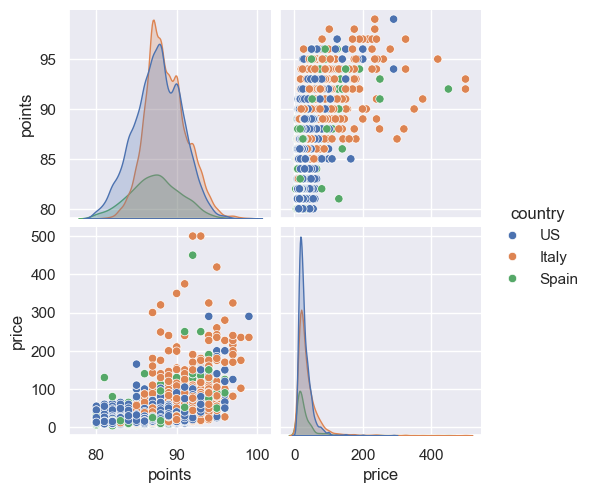

In [59]:
sns.pairplot(vinos_r,hue="country")